 ## Machine Intelligence Exercise 4: Density transformations & random number generation
 
 We are: Belugas on the run (Anna & Leo)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

In computing the CDF, we can make use of the fact that the Laplace distribution is symmetric around the origin

\begin{align*}
F(x) &= 
\int_{-\infty}^x f(u) du &= 
\begin{cases}
\frac{1}{2} \cdot exp(-\frac{x-\mu}{b} &\text{for } x < \mu \\
1 - \frac{1}{2} exp(-\frac{x-\mu}{b} &\text{for } x \geq \mu
\end{cases}
\end{align*}

From this we can derive:

\begin{align*}
F^{-1}(p) &=
\begin{cases}
\mu - b \cdot \ln(2|1 - p|) &\text{for } x \geq \mu \\
\mu - b \cdot \ln(2y) &\text{for } x < \mu
\end{cases}
\end{align*}







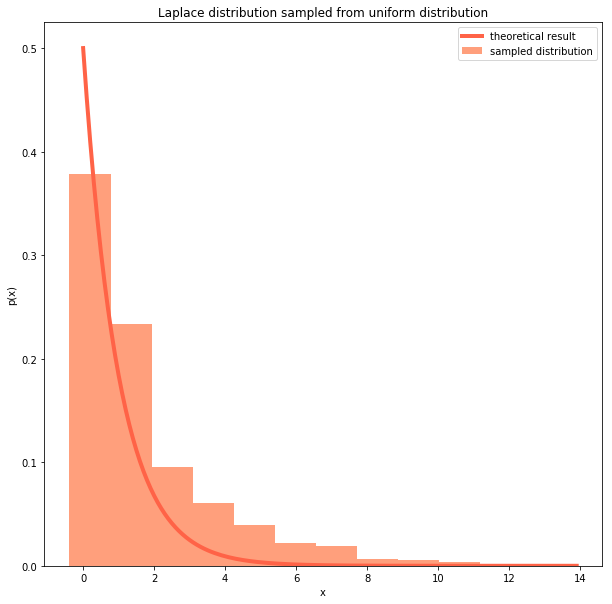

In [36]:
#Task(1): Generate samples of Laplacian distribution from uniformly distributed sample:

unif = np.random.uniform(0,1,500)

#Use hand computed inverse cdf:

mu, b = 1,2

lapl_invCDF = lambda p: mu - b*np.log(2*(1 - p)) if p >= mu else mu - b*np.log(2*p)

result = np.array(list(map(lapl_invCDF, unif)))

plt.figure(figsize=(10,10))

plt.hist(result, bins=10, density=True, color='coral', alpha=.75, label='sampled distribution')
plt.plot(np.arange(0,14,.1), laplace.pdf(np.arange(0,14,.1)), color='tomato', linewidth=4,\
        label='theoretical result')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("Laplace distribution sampled from uniform distribution")
plt.legend()


$\textbf{Exercise 2: Density transformations:}$

$\textbf{Part[a]:}$

We can begin by noticing that, for the one-dimensional case, and under the conditions given, we have: $U= u(x) = u \circ x$ and hence:

\begin{align*}
F_U(u) &= P\{ U \leq u\} \\
&= P\{U(X) \leq u\} \\
&= P\{X \leq U^{-1}(u)\} \\
&= F_X(U^{-1}(u)\}
\end{align*}

and hence, by chain rule:
\begin{equation}
p_{u(x))}(u) = F_U'(u(x)) = p_x(U^{-1}(u)) \frac{d}{du} U^{-1}u = p_x(-\ln(u)) (- \frac{1}{u})
\end{equation}

$\textbf{Part[b]:}$





Let $X_1, X_2$ be uniformly distributed random variables $\in [0,1]^2$. We are given the following transformations:

\begin{equation}
U_1 = \sqrt{-2\ln X_1} \cos(2\pi X_2) = R \cos(\Theta)\\
U_2 = \sqrt{-2\ln X_1} \sin(2\pi X_2) = R \sin(\Theta)\\
\end{equation}

with R = $\sqrt{-2\ln X_1}, \Theta=2\pi X_2$. This transformation will be useful, because we can now express the coordinate transformations as transformations Polar and Cartesian coordinates. We start by calculating the densitites for R and $\Theta$. To do this we calculate and then take the derivative of the the respective cdf. For $\Theta$ this is straighforward. 
\begin{equation}
\textbf{P}[\Theta \leq \theta ] = \textbf{P}[ X_1 2 \pi \leq \theta ] = \textbf{P}[ X_1 2 \leq \frac{\theta}{2 \pi}]
\end{equation}

since $X_2$ is uniformaly distributed over [0,1] this equal $\frac{1}{2 \pi}$. Hence
\begin{equation}
p_{\theta}(x) = \frac{1}{2 \pi}
\end{equation}

We do something similar to calculate $p_R(x)$. We have:

\begin{align*}
P[R \leq r] &= P[\sqrt{-2\ln X_1} \leq r^2]\\
&= P[X_1 \leq exp(-\frac{r^2}{2})]\\
&= 1 - P[X_1 > exp(-\frac{r^2}{2})]\\
&\stackrel{\ast}{=} 1 - \int_0^{exp(\frac{-r}{2})}dt\\
&= 1 - \exp(\frac{-r}{2})
\end{align*}

where ($\ast$) uses the fact that $X_1$ is uniformly distributed.

So $p_{\Theta}=\exp(\frac{-r}{2}) \cdot r$

Since $X_1, X_2$ are independent, so are R, $\Theta$. We thus have:



\begin{equation}
p_{R,\Theta}(s,t) = p_R(s) \cdot p_{\Theta}(t) = \frac{1}{2 \pi}\exp(\frac{-t^2}{2}) \cdot t
\end{equation}

Now, we apply the formula given in the sheet. Since the transformation is $f: (R, \Theta) \rightarrow (r\cos(\theta),r\sin(\theta)$, the transformation is one from Polar to Cartesian coordinates and the respective Jacobian is:

\begin{equation}
\frac{\partial(x,y)}{\partial(r, \theta)}=
\begin{bmatrix}
\cos(\theta) & -r \sin(\theta)\\
sin(\theta) & r \cos(\theta)
\end{bmatrix}
\end{equation}

which has the determinant $r \cos^2(\theta) + r \sin^2(\theta) = r = \sqrt{u_1^2 + u_2^2}$ in the Cartesian system. We thus have:


\begin{align*}
p_{U(x_1,x_2)}(u_1, u_2) &= \frac{p_R \cdot p_{\Theta}}{r}\\
&=\frac{1}{2 \pi} \cdot \exp(-\frac{u_1^2 + u_2^2}{2})\\
&= \frac{1}{\sqrt{2 \pi}} \cdot \exp(-\frac{u_1^2}{2}) \cdot \frac{1}{\sqrt{2 \pi}} \cdot \exp(-\frac{u_2^2}{2})
\end{align*}

which is the product of two $\mathcal{N}_{0,1}$ distributed random variables. Hence, $U_1$ and $U_2$ are independent and normally distributed with zero mean and unit variance.